In [1]:
import qsharp
from PhaseEstimation import run
import matplotlib.pyplot as plt
import numpy as np

Preparing Q# environment...


In [23]:
n_shots = 0
phi = 0
n_oracle = 1

### Variate n_shots

In [96]:
def n_shots_experiment(n_shots=100):
    results_shots = []
    for n_shots in range(1, n_shots + 1):
        result = run.simulate(nShots=n_shots, phi=phi, oraclePower=n_oracle)
        results_shots.append(result[1] / n_shots)
    return results_shots

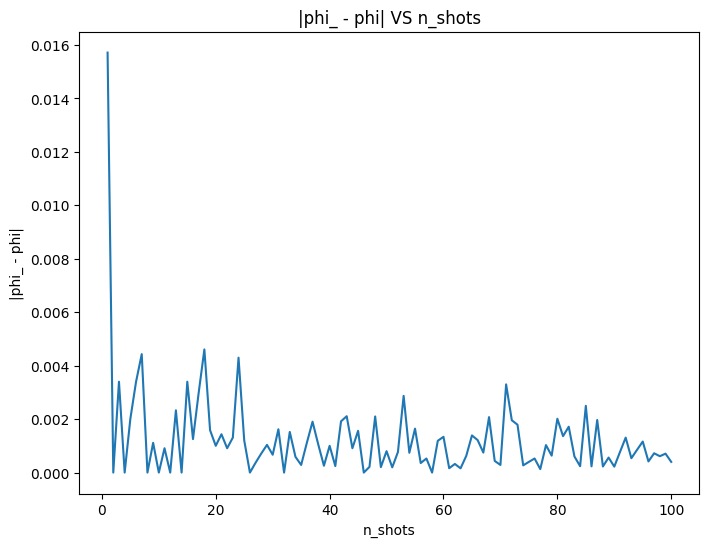

In [97]:
n_shots = 100
results = n_shots_experiment(n_shots)

results = [np.abs(2 / n_oracle * (np.arcsin(np.sqrt(p)) - np.pi / 4) - phi) for p in results]
plt.figure(figsize=(8,6))
plt.plot(list(range(1, n_shots + 1)), results)
plt.xlabel('n_shots')
plt.ylabel('|phi_ - phi|')
plt.title('|phi_ - phi| VS n_shots')
plt.show()

### Variate n_oracles

In [98]:
def n_oracle_experiment(n_oracle=100):
    n_shots = 100
    results_shots = []
    for n_oracle in range(1, n_oracle):
        results = run.simulate(nShots=n_shots, phi=phi, oraclePower=n_oracle)
        res = results[1] / n_shots
        phi_ = (2 / n_oracle) * (np.arcsin(np.sqrt(res)) - np.pi/ 4)
        results_shots.append(np.abs(phi_ - phi))
    return results_shots

[0.060036058445278595, 0.030018029222639186, 0.02001201948175953, 0.040172663237977635, 0.00800213487079784, 0.013347596672276474, 3.172065784643304e-17, 0.007504507305659824, 0.02922468921205211, 0.012028988239478823, 0.014608241177446413, 0.006673798336138237, 0.001538564121030048, 0.010032958193561124, 1.4802973661668754e-17, 0.012584870049395666, 0.0011765490337288602, 0.005564856731197763, 0.0031597925497514933, 0.0020005337176994377, 0.0019052702073328188, 0.003640253637893584, 0.0017395945371299457, 0.005012078433116175, 0.00481159529579152, 8.540177112501205e-18, 0.0037099044874651836, 0.0007143333419068, 0.0027615717252985885, 0.002001201948175946, 0.0006452043088190451, 0.001876126826414956, 0.001212444677393612, 0.004726195675056199, 0.0017153159555793884, 6.1679056923619804e-18, 0.003796254451617723, 0.0021075152640436597, 0.0005128547070100159, 0.002002139500841471, 5.415722071342227e-18, 0.0019067995246109248, 0.004208987238291809, 5.046468293750712e-18, 4.934324553889585

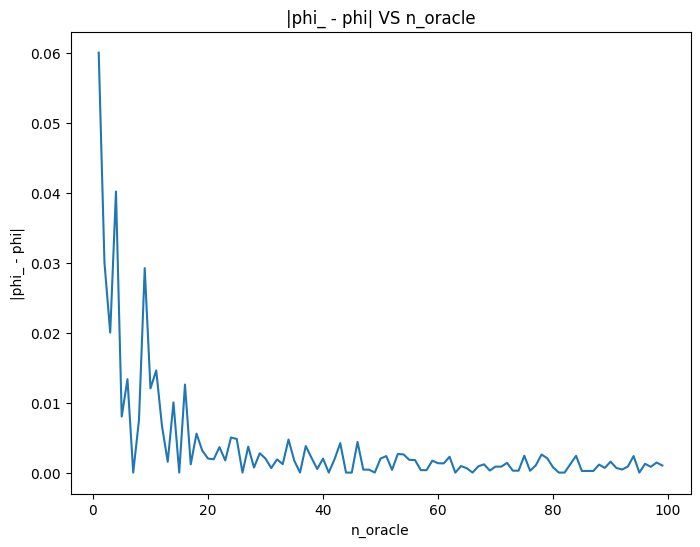

In [99]:
n_oracle = 100
results = n_oracle_experiment(n_oracle=n_oracle)
print(results)
plt.figure(figsize=(8,6))
plt.plot(list(range(1, n_oracle)), results)
plt.xlabel('n_oracle')
plt.ylabel('|phi_ - phi|')
plt.title('|phi_ - phi| VS n_oracle')
plt.show()